# Support Vector Machines (SVM) on Text Data (Concerns)

Lilian (Yuanyuan) Sun | lilian@curajoy.com

# Import Libraries  & Load Data
Load data and preprocessing dependent & independent variables' name

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Data path
file_path = r"./data samples-02-28-2024/Concerns-2-28-2024-V0.5.csv"

# Load data into a pandas DataFrame
df_concerns = pd.read_csv(file_path)

# Display top 5 rows
df_concerns.head(5)

,Concerns,More detailed descriptions,User Inputs,Intents,Quests (Goals),Status,Scoring Groups,Intent Groups,Coaches Responses,Linked Behaviors,Linked Activities
0,Better academics,want/need to do better in school. If just not...,Better academics,"MoodFrustrated, MoodStressed, Mood-Journal, Pe...","Plan better (time management), Finish what I s...",NaN,NaN,NaN,NaN,Doing something other than assignment,"apply to 5 colleges, apply to 5 jobs, assemble..."
1,Active Quest,user is a primary or participating quester,Active Quest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADHD,diagnosed with ADHD or suspects ADHD,ADHD,"Tardies, Absences, MoodFrustrated, Invite Chec...","Take care of my body, Healthy relationship wit...",NaN,"Special Ed, Access/Tangible Function, Escape/A...",NaN,NaN,Doing something other than assignment,"take my medication(s) as prescribed, Be ready ..."
3,Excess Alcohol,"dealing with stress by excessive drinking, bin...",Excess Alcohol,Absences,"Practice impulse control and moderation, Cut m...",NaN,"Alcohol Suspected, High difficulties, Slightly...",NaN,NaN,Binge drinking,Arrange childcare for a night
4,Anger,"difficulty controlling anger or rage, needs he...",Anger,"MoodAngry, MoodFrustrated","Winning and losing graciously, Practice impuls...",NaN,"High difficulties, Slightly raised difficultie...",NaN,NaN,NaN,"do a body check in, Become more self aware by ..."


In [2]:
# Display the original column's name
df_concerns.columns

Index(['Concerns', 'More detailed descriptions', 'User Inputs', 'Intents',
       'Quests (Goals)', 'Status', 'Scoring Groups', 'Intent Groups',
       'Coaches Responses', 'Linked Behaviors', 'Linked Activities'],
      dtype='object')

In [3]:
# Define a mapping of original column names to new names
column_mapping = {
    'Concerns': 'concerns',
    'More detailed descriptions': 'detailed_descriptions',
    'User Inputs': 'user_inputs',
    'Status': 'status',
    'Intents': 'intents',
    'Quests (Goals)': 'quests_goals',
    'Scoring Groups': 'scoring_groups',
    'Intent Groups': 'intent_groups',
    'Utterances': 'utterances',
    'Coaches Responses': 'coaches_responses',
    'Linked Behaviors': 'linked_behaviors',
    'Linked Activities': 'linked_activities'
}

# Rename columns
df_concerns.rename(columns=column_mapping, inplace=True)
df_concerns.head()

,concerns,detailed_descriptions,user_inputs,intents,quests_goals,status,scoring_groups,intent_groups,coaches_responses,linked_behaviors,linked_activities
0,Better academics,want/need to do better in school. If just not...,Better academics,"MoodFrustrated, MoodStressed, Mood-Journal, Pe...","Plan better (time management), Finish what I s...",NaN,NaN,NaN,NaN,Doing something other than assignment,"apply to 5 colleges, apply to 5 jobs, assemble..."
1,Active Quest,user is a primary or participating quester,Active Quest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADHD,diagnosed with ADHD or suspects ADHD,ADHD,"Tardies, Absences, MoodFrustrated, Invite Chec...","Take care of my body, Healthy relationship wit...",NaN,"Special Ed, Access/Tangible Function, Escape/A...",NaN,NaN,Doing something other than assignment,"take my medication(s) as prescribed, Be ready ..."
3,Excess Alcohol,"dealing with stress by excessive drinking, bin...",Excess Alcohol,Absences,"Practice impulse control and moderation, Cut m...",NaN,"Alcohol Suspected, High difficulties, Slightly...",NaN,NaN,Binge drinking,Arrange childcare for a night
4,Anger,"difficulty controlling anger or rage, needs he...",Anger,"MoodAngry, MoodFrustrated","Winning and losing graciously, Practice impuls...",NaN,"High difficulties, Slightly raised difficultie...",NaN,NaN,NaN,"do a body check in, Become more self aware by ..."


# Data Visualization

## View the DataFrame Information

In [79]:
df_concerns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   concerns               2100 non-null   object 
 1   detailed_descriptions  66 non-null     object 
 2   user_inputs            2100 non-null   object 
 3   intents                23 non-null     object 
 4   quests_goals           54 non-null     object 
 5   status                 0 non-null      float64
 6   scoring_groups         46 non-null     object 
 7   intent_groups          10 non-null     object 
 8   coaches_responses      0 non-null      float64
 9   linked_behaviors       6 non-null      object 
 10  linked_activities      50 non-null     object 
dtypes: float64(2), object(9)
memory usage: 180.6+ KB


## View DataFrame Statistical Summary

generates descriptive statistics summarizing the central tendency, dispersion, and shape of the distribution of numerical columns in the DataFrame.

In [80]:
df_concerns.describe()

,status,coaches_responses
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


## Missing Values Visualization

In [81]:
df_concerns.isnull()

,concerns,detailed_descriptions,user_inputs,intents,quests_goals,status,scoring_groups,intent_groups,coaches_responses,linked_behaviors,linked_activities
0,False,False,False,False,False,True,True,True,True,False,False
1,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,False,True,True,False,False
3,False,False,False,False,False,True,False,True,True,False,False
4,False,False,False,False,False,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2095,False,True,False,True,True,True,True,True,True,True,True
2096,False,True,False,True,True,True,True,True,True,True,True
2097,False,True,False,True,True,True,True,True,True,True,True
2098,False,True,False,True,True,True,True,True,True,True,True


<AxesSubplot:>

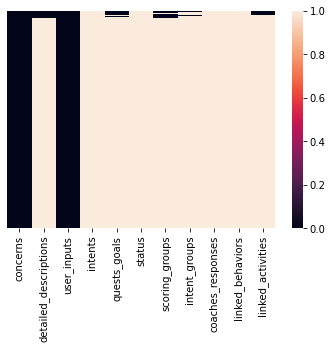

In [82]:
sns.heatmap(df_concerns.isnull(), yticklabels = False)

<AxesSubplot:xlabel='concerns', ylabel='count'>

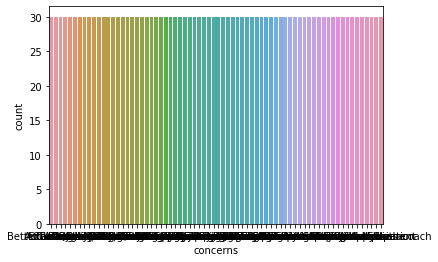

In [83]:
# Plot the count plot for the concerns
sns.countplot(x = df_concerns['concerns'])

# Exploratory Data Analysis 

## General Information of the Data Samples

In [84]:
# an idea of the size of the dataset
print("Shape of the dataset:", df_concerns.shape)

Shape of the dataset: (2100, 11)


In [85]:
# understand what features are present
print("Column names:", df_concerns.columns)

Column names: Index(['concerns', 'detailed_descriptions', 'user_inputs', 'intents',
       'quests_goals', 'status', 'scoring_groups', 'intent_groups',
       'coaches_responses', 'linked_behaviors', 'linked_activities'],
      dtype='object')


In [86]:
# understanding how to handle each feature during analysis.
# after discussion, user_inputs as the only input feature
print("Data types of each column:")
print(df_concerns.dtypes)

Data types of each column:
concerns                  object
detailed_descriptions     object
user_inputs               object
intents                   object
quests_goals              object
status                   float64
scoring_groups            object
intent_groups             object
coaches_responses        float64
linked_behaviors          object
linked_activities         object
dtype: object


Summary Statistics: Compute summary statistics for numerical columns. This provides insights into central tendency, dispersion, and distribution of your numerical features.

In [87]:
print("Summary statistics for numerical columns:")
print(df_concerns.describe())

Summary statistics for numerical columns:
       status  coaches_responses
count     0.0                0.0
mean      NaN                NaN
std       NaN                NaN
min       NaN                NaN
25%       NaN                NaN
50%       NaN                NaN
75%       NaN                NaN
max       NaN                NaN


## User Inputs Length

In [88]:
# Check for NaN values in 'user_inputs' column
nan_indices = df_concerns['user_inputs'].isnull()
# Fill NaN values with empty strings
df_concerns['user_inputs'].fillna('', inplace=True)

# get the length of the user_inputs column
df_concerns['length'] = df_concerns['user_inputs'].apply(len)
df_concerns.head()

,concerns,detailed_descriptions,user_inputs,intents,quests_goals,status,scoring_groups,intent_groups,coaches_responses,linked_behaviors,linked_activities,length
0,Better academics,want/need to do better in school. If just not...,Better academics,"MoodFrustrated, MoodStressed, Mood-Journal, Pe...","Plan better (time management), Finish what I s...",NaN,NaN,NaN,NaN,Doing something other than assignment,"apply to 5 colleges, apply to 5 jobs, assemble...",16
1,Active Quest,user is a primary or participating quester,Active Quest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
2,ADHD,diagnosed with ADHD or suspects ADHD,ADHD,"Tardies, Absences, MoodFrustrated, Invite Chec...","Take care of my body, Healthy relationship wit...",NaN,"Special Ed, Access/Tangible Function, Escape/A...",NaN,NaN,Doing something other than assignment,"take my medication(s) as prescribed, Be ready ...",5
3,Excess Alcohol,"dealing with stress by excessive drinking, bin...",Excess Alcohol,Absences,"Practice impulse control and moderation, Cut m...",NaN,"Alcohol Suspected, High difficulties, Slightly...",NaN,NaN,Binge drinking,Arrange childcare for a night,14
4,Anger,"difficulty controlling anger or rage, needs he...",Anger,"MoodAngry, MoodFrustrated","Winning and losing graciously, Practice impuls...",NaN,"High difficulties, Slightly raised difficultie...",NaN,NaN,NaN,"do a body check in, Become more self aware by ...",6


<AxesSubplot:ylabel='Frequency'>

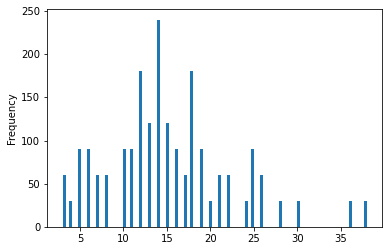

In [89]:
# Plot the histogram for the length
df_concerns['length'].plot(bins = 100, kind = 'hist')

In [90]:
# Apply the describe method to get statistical summary
df_concerns.describe()

,status,coaches_responses,length
count,0.0,0.0,2100.000000
mean,NaN,NaN,15.257143
std,NaN,NaN,7.241862
min,NaN,NaN,3.000000
25%,NaN,NaN,11.000000
50%,NaN,NaN,14.000000
75%,NaN,NaN,19.000000
max,NaN,NaN,38.000000


In [91]:
# Let's see the longest message 
df_concerns[df_concerns['length'] == 38.000000]

,concerns,detailed_descriptions,user_inputs,intents,quests_goals,status,scoring_groups,intent_groups,coaches_responses,linked_behaviors,linked_activities,length
56,Personal Growth and Self-Actualization,this user is seeking more fulfillment and purp...,Personal Growth and Self-Actualization,NaN,"Grow my career, Give back to my community, Get...",NaN,Low risk of toxic stress,NaN,NaN,NaN,"Admit when I'm wrong, Apologize for what I did...",38
126,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
196,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
266,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
336,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
406,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
476,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
546,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
616,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
686,Personal Growth and Self-Actualization,NaN,Personal Growth and Self-Actualization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


In [92]:
df_concerns[df_concerns['length'] == 38.000000]['user_inputs'].iloc[0]

'Personal Growth and Self-Actualization'

## Missing Values
Missing Values: Identify if there are any missing values in your dataset. Missing data can affect analysis and modeling results.

In [93]:
# Check for null values in each column
null_counts = df_concerns.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
concerns                    0
detailed_descriptions    2034
user_inputs                 0
intents                  2077
quests_goals             2046
status                   2100
scoring_groups           2054
intent_groups            2090
coaches_responses        2100
linked_behaviors         2094
linked_activities        2050
length                      0
dtype: int64


In [94]:
# Calculate the total number of rows
total_rows = len(df_concerns)
# Calculate the percentage of null values in each column
null_percentages = (df_concerns.isnull().sum() / total_rows) * 100

# Format the percentages
formatted_percentages = null_percentages.map("{:.2f}%".format)
print("Percentage of null values in each column:")
print(formatted_percentages)

Percentage of null values in each column:
concerns                   0.00%
detailed_descriptions     96.86%
user_inputs                0.00%
intents                   98.90%
quests_goals              97.43%
status                   100.00%
scoring_groups            97.81%
intent_groups             99.52%
coaches_responses        100.00%
linked_behaviors          99.71%
linked_activities         97.62%
length                     0.00%
dtype: object


In [95]:
# Filter columns where null percentage is less than 20%
filtered_columns = null_percentages[null_percentages < 20]

# Print the filtered columns along with their null percentages
print("Columns with less than 30% null values:")
for column, percentages in filtered_columns.items():
    print(f"{column}: {percentages:.2f}%")

Columns with less than 30% null values:
concerns: 0.00%
user_inputs: 0.00%
length: 0.00%


## Unique Values
Check the unique values in categorical or discrete columns. This helps us understand the diversity and distribution of categorical variables.

In [96]:
print("Unique values in each column:")
for column in data_concerns.columns:
    print(column, ":", data_concerns[column].unique())

Unique values in each column:
concerns : ['Better academics' 'Active Quest' 'ADHD ' 'Excess Alcohol' 'Anger '
 'Clinical Anxiety' 'Attendance Problems' 'Autism (Self)'
 'Challenging Behaviors' 'Job Hunting' 'Communication Deficits' 'Bored'
 'Discrimination/Racism' 'Drug Use' 'Executive Functioning Skills'
 'Good Families' 'Build wealth' 'Bad Friends' 'Hyperactivity/Inattention'
 'Intellectual disability ID' 'Learning disability' 'Poor Marriage'
 'Poor Mental Health' 'Motivation and procrastination' 'Parenting Stress'
 'Perfectionism' 'Personal Care and Hygiene' 'Declining physical health'
 'Resilience' 'Self-Regulation and Coping' 'Estranged families'
 'Need Tolerance Inclusion' 'Trauma' 'Stress' 'Debt' 'Sleep Disturbance'
 'Eating Disorder' 'Aging' 'Vaping/Smoking' 'Maintaining Employment'
 'Just Relocated' 'Diagnosed Depression' 'Behind on work' 'FBA'
 'Sibling Rivalry' 'Suicidal Ideations' 'Suicide Risk' 'Emotional Abuse'
 'Divorcing parents' 'No Friends' 'SPED caregiver'
 'Transiti

## How many categories in the dependent variable

The dependent variable is "concerns" which is classified and defined by clinicians, domain experts, business roles, etc.


In [97]:
distinct_concerns = data_concerns['concerns'].unique()

print("Distinct values in 'concerns' column with IDs: ")
for idx, value in enumerate(distinct_concerns, start=1):
    print(f"{idx}: {value}")

Distinct values in 'concerns' column with IDs: 
1: Better academics
2: Active Quest
3: ADHD 
4: Excess Alcohol
5: Anger 
6: Clinical Anxiety
7: Attendance Problems
8: Autism (Self)
9: Challenging Behaviors
10: Job Hunting
11: Communication Deficits
12: Bored
13: Discrimination/Racism
14: Drug Use
15: Executive Functioning Skills
16: Good Families
17: Build wealth
18: Bad Friends
19: Hyperactivity/Inattention
20: Intellectual disability ID
21: Learning disability
22: Poor Marriage
23: Poor Mental Health
24: Motivation and procrastination
25: Parenting Stress
26: Perfectionism
27: Personal Care and Hygiene
28: Declining physical health
29: Resilience
30: Self-Regulation and Coping
31: Estranged families
32: Need Tolerance Inclusion
33: Trauma
34: Stress
35: Debt
36: Sleep Disturbance
37: Eating Disorder
38: Aging
39: Vaping/Smoking
40: Maintaining Employment
41: Just Relocated
42: Diagnosed Depression
43: Behind on work
44: FBA
45: Sibling Rivalry
46: Suicidal Ideations
47: Suicide Risk


# Feature Engineering / Text Processing Pipeline


## Convert to list format

In [98]:
# Convert to list format
inputs = df_concerns['user_inputs'].tolist()
len(inputs)

2100

In [99]:
# Join all inputs into one large string
inputs_as_one_string = ''.join(inputs)
inputs_as_one_string

'Better academicsActive QuestADHD Excess AlcoholAnger Clinical AnxietyAttendance ProblemsAutism (Self)Challenging BehaviorsJob HuntingCommunication DeficitsBoredDiscrimination/RacismDrug UseExecutive Functioning SkillsGood FamiliesBuild wealthBad FriendsHyperactivity/InattentionIntellectual disability IDLearning disabilityPoor MarriagePoor Mental HealthMotivation and procrastinationParenting StressPerfectionismPersonal Care and HygieneDeclining physical healthResilienceSelf-Regulation and CopingEstranged familiesNeed Tolerance InclusionTraumaStressDebtSleep DisturbanceEating DisorderAgingVaping/SmokingMaintaining EmploymentJust RelocatedDiagnosed DepressionBehind on workFBASibling RivalrySuicidal IdeationsSuicide RiskEmotional AbuseDivorcing parentsNo FriendsSPED caregiverTransition to adulthood/independenceLonelinessPoor social skillsSocial anxietyLack of confidencePersonal Growth and Self-ActualizationHoardingPovertyBipolarChronic illnessSportmanshipGeneral IntakePhysical abuseSexual

## Remove punctuation

In [100]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [101]:
inputs_as_one_string_punc_removed = [char for char in inputs_as_one_string if char not in string.punctuation]
inputs_as_one_string_punc_removed

['B',
 'e',
 't',
 't',
 'e',
 'r',
 ' ',
 'a',
 'c',
 'a',
 'd',
 'e',
 'm',
 'i',
 'c',
 's',
 'A',
 'c',
 't',
 'i',
 'v',
 'e',
 ' ',
 'Q',
 'u',
 'e',
 's',
 't',
 'A',
 'D',
 'H',
 'D',
 ' ',
 'E',
 'x',
 'c',
 'e',
 's',
 's',
 ' ',
 'A',
 'l',
 'c',
 'o',
 'h',
 'o',
 'l',
 'A',
 'n',
 'g',
 'e',
 'r',
 ' ',
 'C',
 'l',
 'i',
 'n',
 'i',
 'c',
 'a',
 'l',
 ' ',
 'A',
 'n',
 'x',
 'i',
 'e',
 't',
 'y',
 'A',
 't',
 't',
 'e',
 'n',
 'd',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'P',
 'r',
 'o',
 'b',
 'l',
 'e',
 'm',
 's',
 'A',
 'u',
 't',
 'i',
 's',
 'm',
 ' ',
 'S',
 'e',
 'l',
 'f',
 'C',
 'h',
 'a',
 'l',
 'l',
 'e',
 'n',
 'g',
 'i',
 'n',
 'g',
 ' ',
 'B',
 'e',
 'h',
 'a',
 'v',
 'i',
 'o',
 'r',
 's',
 'J',
 'o',
 'b',
 ' ',
 'H',
 'u',
 'n',
 't',
 'i',
 'n',
 'g',
 'C',
 'o',
 'm',
 'm',
 'u',
 'n',
 'i',
 'c',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'D',
 'e',
 'f',
 'i',
 'c',
 'i',
 't',
 's',
 'B',
 'o',
 'r',
 'e',
 'd',
 'D',
 'i',
 's',
 'c',
 'r',
 'i',
 'm',
 'i',
 'n'

In [102]:
# Join the characters again to form the string.
inputs_as_one_string_punc_removed_join = ''.join(inputs_as_one_string_punc_removed)
inputs_as_one_string_punc_removed_join

'Better academicsActive QuestADHD Excess AlcoholAnger Clinical AnxietyAttendance ProblemsAutism SelfChallenging BehaviorsJob HuntingCommunication DeficitsBoredDiscriminationRacismDrug UseExecutive Functioning SkillsGood FamiliesBuild wealthBad FriendsHyperactivityInattentionIntellectual disability IDLearning disabilityPoor MarriagePoor Mental HealthMotivation and procrastinationParenting StressPerfectionismPersonal Care and HygieneDeclining physical healthResilienceSelfRegulation and CopingEstranged familiesNeed Tolerance InclusionTraumaStressDebtSleep DisturbanceEating DisorderAgingVapingSmokingMaintaining EmploymentJust RelocatedDiagnosed DepressionBehind on workFBASibling RivalrySuicidal IdeationsSuicide RiskEmotional AbuseDivorcing parentsNo FriendsSPED caregiverTransition to adulthoodindependenceLonelinessPoor social skillsSocial anxietyLack of confidencePersonal Growth and SelfActualizationHoardingPovertyBipolarChronic illnessSportmanshipGeneral IntakePhysical abuseSexual abuseCh

## Remove stopwords

In [103]:
import nltk # Natural Language tool kit 
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [104]:
# inputs_as_one_string_punc_removed_join 
inputs_as_one_string_punc_stopwords_removed_join_clean = [word for word in inputs_as_one_string_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
inputs_as_one_string_punc_stopwords_removed_join_clean

['Better',
 'academicsActive',
 'QuestADHD',
 'Excess',
 'AlcoholAnger',
 'Clinical',
 'AnxietyAttendance',
 'ProblemsAutism',
 'SelfChallenging',
 'BehaviorsJob',
 'HuntingCommunication',
 'DeficitsBoredDiscriminationRacismDrug',
 'UseExecutive',
 'Functioning',
 'SkillsGood',
 'FamiliesBuild',
 'wealthBad',
 'FriendsHyperactivityInattentionIntellectual',
 'disability',
 'IDLearning',
 'disabilityPoor',
 'MarriagePoor',
 'Mental',
 'HealthMotivation',
 'procrastinationParenting',
 'StressPerfectionismPersonal',
 'Care',
 'HygieneDeclining',
 'physical',
 'healthResilienceSelfRegulation',
 'CopingEstranged',
 'familiesNeed',
 'Tolerance',
 'InclusionTraumaStressDebtSleep',
 'DisturbanceEating',
 'DisorderAgingVapingSmokingMaintaining',
 'EmploymentJust',
 'RelocatedDiagnosed',
 'DepressionBehind',
 'workFBASibling',
 'RivalrySuicidal',
 'IdeationsSuicide',
 'RiskEmotional',
 'AbuseDivorcing',
 'parentsNo',
 'FriendsSPED',
 'caregiverTransition',
 'adulthoodindependenceLonelinessPoor',


## Perform Count Vectorization (Tokenization)

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(inputs_as_one_string_punc_stopwords_removed_join_clean)

print(vectorizer.get_feature_names_out() )

['abusechild' 'abusedivorcing' 'abuseeslunhappy' 'abuseincarcerated'
 'abusesexual' 'academicsactive' 'adulthoodindependencelonelinesspoor'
 'alcoholanger' 'anxietyattendance' 'anxietylack' 'behaviorsjob' 'better'
 'care' 'caregivertransition' 'clinical' 'coach' 'coachbetter'
 'confidencepersonal' 'copingestranged'
 'deficitsboreddiscriminationracismdrug' 'depressionbehind' 'disability'
 'disabilitypoor' 'disorderagingvapingsmokingmaintaining'
 'disturbanceeating' 'employmentjust' 'excess' 'familiesbuild'
 'familiesneed' 'friendshyperactivityinattentionintellectual'
 'friendssped' 'functioning' 'growth' 'healthmotivation'
 'healthresilienceselfregulation' 'huntingcommunication'
 'hygienedeclining' 'ideationssuicide' 'idlearning'
 'illnesssportmanshipgeneral' 'inclusiontraumastressdebtsleep'
 'intakephysical' 'marriagepoor' 'mental' 'parentactive' 'parentsno'
 'physical' 'problemsautism' 'procrastinationparenting' 'questadhd'
 'relocateddiagnosed' 'riskemotional' 'rivalrysuicidal'
 'sel

In [106]:
print(X.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [107]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [108]:
df_concerns_clean = df_concerns['user_inputs'].apply(message_cleaning)

print(df_concerns['user_inputs'][5]) 

Clinical Anxiety


In [109]:
# show the cleaned up version
print(df_concerns_clean[5])

['Clinical', 'Anxiety']


In [110]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
inputs_countvectorizer = vectorizer.fit_transform(df_concerns['user_inputs'])

print(vectorizer.get_feature_names_out())

['ADHD' 'Abuse' 'Active' 'Aging' 'Alcohol' 'Anger' 'Anxiety' 'Attendance'
 'Autism' 'Bad' 'Behaviors' 'Behind' 'Better' 'Bipolar' 'Bored' 'Build'
 'Care' 'Challenging' 'Child' 'Chronic' 'Clinical' 'Communication'
 'Coping' 'Debt' 'Declining' 'Deficits' 'Depression' 'Diagnosed'
 'DiscriminationRacism' 'Disorder' 'Disturbance' 'Divorcing' 'Drug' 'ESL'
 'Eating' 'Emotional' 'Employment' 'Estranged' 'Excess' 'Executive' 'FBA'
 'Families' 'Friends' 'Functioning' 'General' 'Good' 'Growth' 'Health'
 'Hoarding' 'Hunting' 'Hygiene' 'HyperactivityInattention' 'ID'
 'Ideations' 'Incarcerated' 'Inclusion' 'Intake' 'Intellectual' 'Job'
 'Lack' 'Learning' 'Loneliness' 'Maintaining' 'Marriage' 'Mental'
 'Motivation' 'Need' 'Parenting' 'Perfectionism' 'Personal' 'Physical'
 'Poor' 'Poverty' 'Problems' 'Quest' 'Relocated' 'Resilience' 'Risk'
 'Rivalry' 'SPED' 'Self' 'SelfActualization' 'SelfRegulation' 'Sexual'
 'Sibling' 'Skills' 'Sleep' 'Social' 'Sportmanship' 'Stress' 'Suicidal'
 'Suicide' 'Toleranc

In [111]:
print(inputs_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [112]:
inputs_countvectorizer.shape

(2100, 117)

In [113]:
user_inputs = pd.DataFrame(inputs_countvectorizer.toarray())

In [114]:
X = user_inputs
X

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2096,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2097,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
y = df_concerns['concerns']
y

0          Better academics
1              Active Quest
2                     ADHD 
3            Excess Alcohol
4                    Anger 
               ...         
2095            Child abuse
2096    Incarcerated parent
2097           Active Abuse
2098                    ESL
2099     unhappy with coach
Name: concerns, Length: 2100, dtype: object

In [116]:
X.shape

(2100, 117)

In [117]:
y.shape

(2100,)

# 4. Model Training

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

                                        precision    recall  f1-score   support

                                 ADHD        1.00      1.00      1.00         3
                          Active Abuse       1.00      1.00      1.00        13
                          Active Quest       1.00      1.00      1.00         3
                                 Aging       1.00      1.00      1.00         5
                                Anger        1.00      1.00      1.00         7
                   Attendance Problems       1.00      1.00      1.00         7
                         Autism (Self)       1.00      1.00      1.00         5
                           Bad Friends       1.00      1.00      1.00         4
                        Behind on work       1.00      1.00      1.00         8
                      Better academics       1.00      1.00      1.00         5
                               Bipolar       1.00      1.00      1.00         4
                                 Bored 

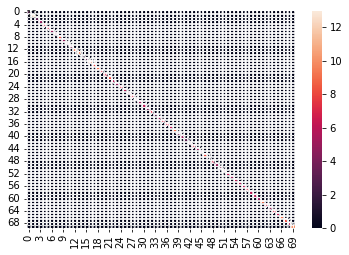

In [120]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Create SVM model
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Print classification report
print(classification_report(y_test, y_pred))
